# Get scan affine transformation

 Chia-Hao Lee

cl2696@cornell.edu

Created 2024.08.22

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imwrite


In [3]:
work_dir = "H:\workspace\ptyrad"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad


In [4]:
from ptyrad.visualization import plot_affine_transformation
from ptyrad.utils import compose_affine_matrix, decompose_affine_matrix

ptyrad version: v0.1.0-beta2.0


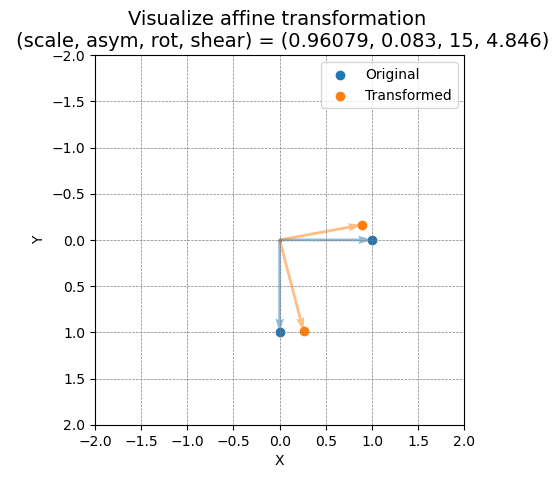

array([[ 0.98852349,  0.25899059],
       [-0.16293509,  0.88953772]])

In [15]:
scale=0.96079
asymmetry=0.083
rotation=15#-0.426
shear=4.846
Af = compose_affine_matrix(scale, asymmetry, rotation, shear)
plot_affine_transformation(scale, asymmetry, rotation, shear)
Af

(15, 1095, 904)


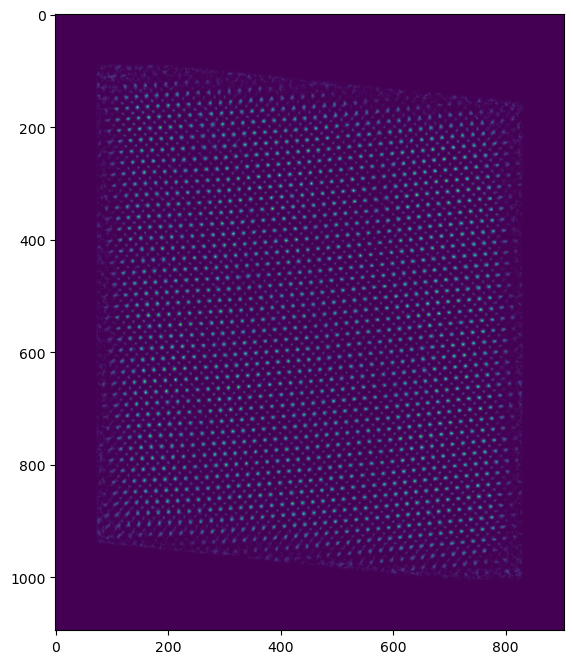

In [5]:
file_path = 'output/tSTO_04/20240822_full_N65536_dp128_random32_p6_1obj_15slice_dz10_plr1e-4_oalr5e-4_oplr5e-4_slr1e-4_tlr0_dpblur0.5_orblur0.4_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff0.96_0.14_0_6/objp_zstack_iter0100.tif'
imstack = imread(file_path)
print(imstack.shape)

img = imstack[4]
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()
imwrite('img.tif', np.float32(img))

In [6]:
from scipy.ndimage import affine_transform

(1095, 904)


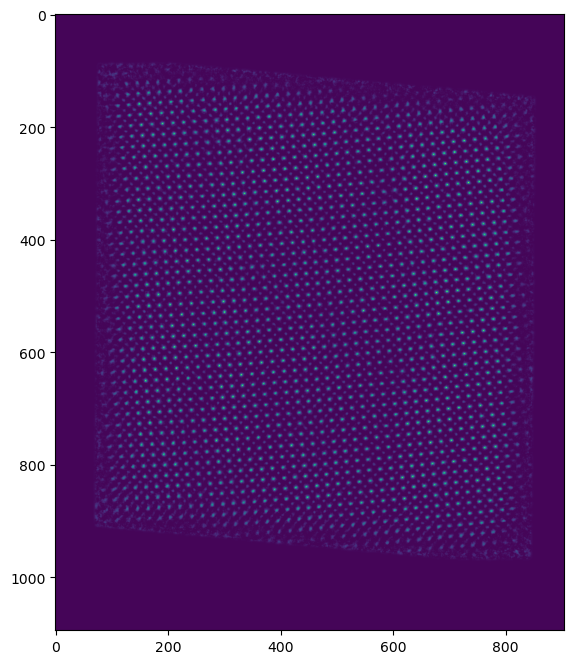

In [7]:
aff_img = affine_transform(img, np.linalg.inv(Af)) # scipy's affine transform maps the output to input, so we need to inverse the affine transform
print(aff_img.shape)
plt.figure(figsize=(8,8))
plt.imshow(aff_img)
plt.show()
imwrite('aff_img.tif', np.float32(aff_img))